In [1]:
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2

In [2]:
import optpour

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Testing get_next_nodes for many initial states

In [4]:
maxrow = 2
maxcol = 2

In [5]:
expected = [((0, 0), )]
node = optpour.Node(maxrow, maxcol)
if node.get_next_nodes() == expected:
    print('Passed on test')
else:
    print('Did not pass')

Passed on test


In [6]:
state = ((0, 0),)
expected = [((0, 0), (0, 1)), ((0, 0), (1, 0))]
node = optpour.Node(maxrow, maxcol, state)
if node.get_next_nodes() == expected:
    print('Passed on test')
else:
    print('Did not pass')

Passed on test


In [7]:
state = ((0, 0), (0, 1))
expected = [((0, 0), (0, 1), (1, 0))]
node = optpour.Node(maxrow, maxcol, state)
if node.get_next_nodes() == expected:
    print('Passed on test')
else:
    print('Did not pass')

Passed on test


In [8]:
state = ((0, 0), (0, 1), (1, 0))
expected = [((0, 0), (0, 1), (1, 0), (1, 1))]
node = optpour.Node(maxrow, maxcol, state)
if node.get_next_nodes() == expected:
    print('Passed on test')
else:
    print('Did not pass')

Passed on test


In [9]:
state = ((0, 0), (0, 1), (1, 0), (1, 1))
expected = []
node = optpour.Node(maxrow, maxcol, state)
if node.get_next_nodes() == expected:
    print('Passed on test')
else:
    print('Did not pass')

Passed on test


## Evaluating order of possible sons

In [10]:
node = optpour.Node(2, 2)

In [11]:
node.get_all_children()

{((0, 0),),
 ((0, 0), (0, 1)),
 ((0, 0), (0, 1), (1, 0)),
 ((0, 0), (0, 1), (1, 0), (1, 1)),
 ((0, 0), (1, 0))}

In [12]:
node = optpour.Node(3, 3)

In [13]:
node.get_all_children()

{((0, 0),),
 ((0, 0), (0, 1)),
 ((0, 0), (0, 1), (0, 2)),
 ((0, 0), (0, 1), (0, 2), (1, 0)),
 ((0, 0), (0, 1), (0, 2), (1, 0), (1, 1)),
 ((0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)),
 ((0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0)),
 ((0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1)),
 ((0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)),
 ((0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (2, 0)),
 ((0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (2, 0), (2, 1)),
 ((0, 0), (0, 1), (0, 2), (1, 0), (2, 0)),
 ((0, 0), (0, 1), (1, 0)),
 ((0, 0), (0, 1), (1, 0), (1, 1)),
 ((0, 0), (0, 1), (1, 0), (1, 1), (2, 0)),
 ((0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)),
 ((0, 0), (0, 1), (1, 0), (2, 0)),
 ((0, 0), (1, 0)),
 ((0, 0), (1, 0), (2, 0))}

In [14]:
len(node.get_all_children())

19

In [15]:
lens = []
for l in range(1, 11):
    node = optpour.Node(l, l)
    lens.append(len(node.get_all_children()))
    print(f'{lens[-1] + 1} cases inside the constraint over {2 ** (l * l)} cases')

2 cases inside the constraint over 2 cases
6 cases inside the constraint over 16 cases
20 cases inside the constraint over 512 cases
70 cases inside the constraint over 65536 cases
252 cases inside the constraint over 33554432 cases
924 cases inside the constraint over 68719476736 cases
3432 cases inside the constraint over 562949953421312 cases
12870 cases inside the constraint over 18446744073709551616 cases
48620 cases inside the constraint over 2417851639229258349412352 cases
184756 cases inside the constraint over 1267650600228229401496703205376 cases


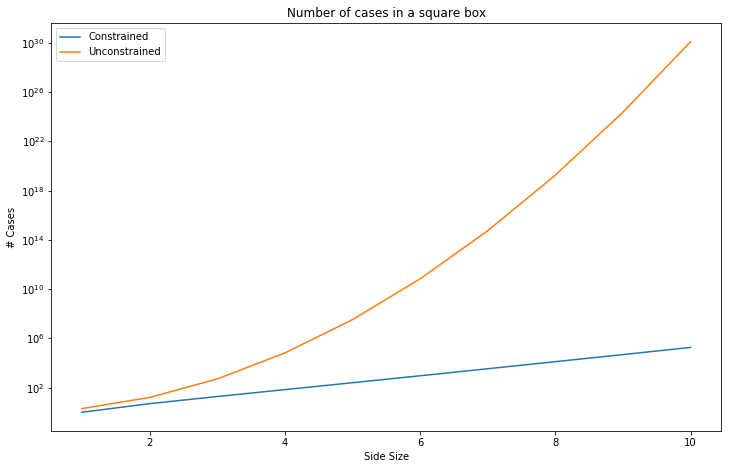

In [16]:
plt.figure(figsize=(12, 7.5))
plt.title('Number of cases in a square box')
plt.plot(range(1, 11), lens, label='Constrained')
plt.plot(range(1, 11), [2 ** (l * l) for l in range(1, 11)], label='Unconstrained')
plt.ylabel('# Cases')
plt.xlabel('Side Size')
plt.yscale('log')
plt.legend()

## Testing eval functions

In [17]:
qtt_array = np.array(
    [[1000, 500, 600],
     [400, 300, 400],
     [1000, 300, 600]]
)
qtt_array

array([[1000,  500,  600],
       [ 400,  300,  400],
       [1000,  300,  600]])

In [18]:
bad_array = np.array(
    [[0, 10, 50],
     [10, 300, 400],
     [1000, 300, 600]]
)
bad_array

array([[   0,   10,   50],
       [  10,  300,  400],
       [1000,  300,  600]])

In [19]:
node = optpour.Node(3, 3)

In [20]:
node.get_next_nodes()

[((0, 0),)]

In [21]:
state = node.get_next_nodes()[0]
expected = np.array(
    [[ True, False, False],
     [False, False, False],
     [False, False, False]])
state_array = node.array_from_state(state)
if np.array_equal(state_array, expected):
    print('Passed on test')
else:
    print('Did not pass')

Passed on test


In [22]:
expected = 1000
qtt = node.eval_qtt(state, qtt_array)
if qtt == expected:
    print('Passed on test')
else:
    print('Did not pass')

Passed on test


In [23]:
expected = 0
br = node.eval_br(state, qtt_array, bad_array)
if br == expected:
    print('Passed on test')
else:
    print('Did not pass')

Passed on test


In [24]:
state = ((0, 0), (0, 1), (1, 0))

In [25]:
expected = 1900
qtt = node.eval_qtt(state, qtt_array)
if qtt == expected:
    print('Passed on test')
else:
    print('Did not pass')

Passed on test


In [26]:
20 / 1900

0.010526315789473684

In [27]:
expected = 20 / 1900
br = node.eval_br(state, qtt_array, bad_array)
if br == expected:
    print('Passed on test')
else:
    print('Did not pass')

Passed on test


## Testing optimization

In [28]:
expected_best = ((0, 0), (0, 1))
sorted_candidates = node.optimize_naive(qtt_array, bad_array, 0.01)
if sorted_candidates[0][0] == expected_best:
    print('Passed on test')
else:
    print('Did not pass')

Passed on test


In [29]:
if len(sorted_candidates) == 3:
    print('Passed on test')
else:
    print('Did not pass')

Passed on test


In [30]:
sorted_candidates

[(((0, 0), (0, 1)), (1, 1500, 0.006666666666666667)),
 (((0, 0), (1, 0)), (1, 1400, 0.007142857142857143)),
 (((0, 0),), (1, 1000, 0.0))]